In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

In [3]:
ds = pd.read_csv('dataset/tweets_ec_nd_conv.csv', usecols=['id', 'screen_name', 'location', 'description', 'latitude','statuses_count','followers_count','friends_count','favourites_count','text', 'conversation_id', 'num_replies'])
ds.shape

(2716464, 12)

In [4]:
num_users=ds.screen_name.nunique()
num_users

166399

In [5]:
useratt=ds[['screen_name','statuses_count','followers_count','friends_count','favourites_count']]
useratt=useratt.groupby('screen_name').mean()
useratt.reset_index(inplace=True)

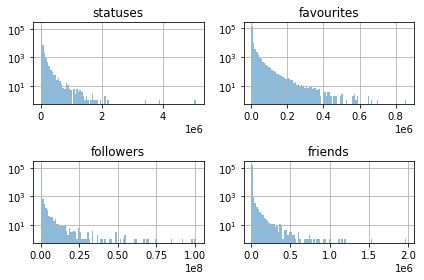

In [6]:

majorFormatter = FormatStrFormatter('%d')

fig= plt.figure()


ax=plt.subplot(2,2,1)
useratt.statuses_count.hist( bins=100,alpha=0.5)
ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
plt.yscale('log')
plt.title('statuses')

ax=plt.subplot(2,2,2)
useratt.favourites_count.hist( bins=100,alpha=0.5)
ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
plt.yscale('log')
plt.title('favourites')

ax=plt.subplot(2,2,3)
useratt.followers_count.hist( bins=100,alpha=0.5)
ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
plt.yscale('log')
plt.title('followers')

ax=plt.subplot(2,2,4)
useratt.friends_count.hist( bins=100,alpha=0.5)
ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
plt.yscale('log')
plt.title('friends')

plt.tight_layout()

In [7]:
dsdesc= ds[(~ds.description.isnull()) & (ds.description!='')]
has_desc=dsdesc.screen_name.nunique()
perc=has_desc/num_users
perc

0.9311894903214563

In [8]:
dsloc= ds[(~ds.location.isnull()) & (ds.location!='')]
has_loc=dsloc.screen_name.nunique()
perc=has_loc/num_users
perc

0.8706061935468362

In [9]:
dsloc.location.nunique()

38815

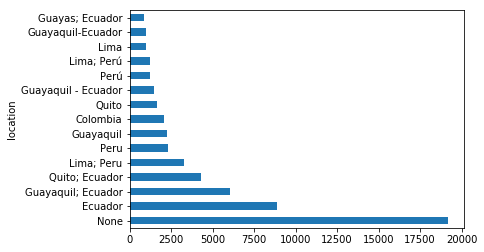

In [10]:
dsloc=dsloc[['screen_name', 'location']]
userloc=dsloc.groupby(['screen_name']).agg({'location': 'last'})
userloc.reset_index(inplace=True)
userloc=userloc.groupby('location').size()
userloc=userloc.sort_values(ascending=False).head(15)
userloc.plot.barh()

In [11]:
ds.dtypes

id                    int64
screen_name          object
statuses_count        int64
followers_count       int64
friends_count         int64
favourites_count      int64
location             object
description          object
latitude            float64
text                 object
conversation_id       int64
num_replies           int64
dtype: object

In [12]:
desc=ds['description'].unique()
desc[1]
ds['description']=ds.description.astype(str)

In [13]:
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
import re

use_stemmer = False
stemmer = SnowballStemmer("spanish")
stopset = set(stopwords.words('english') + stopwords.words('spanish'))

def tokenize(text):
    text = re.sub(r"(?:\#|@|https?\://)\S+", "", text)
    text = re.sub("[^a-zA-Z] ","",text)
    text = re.sub(r'\b\w{1,2}\b',' ',text)
    text = re.sub(r'http[\bs]*',' ',text)
    tokens = word_tokenize(text)
    if use_stemmer:
        tokens = [stemmer.stem(t) for t in tokens]
    return tokens

words = ' '.join(ds['description'])

use_stemmer=False
word_list = tokenize(words)
word_list = [word for word in word_list if word not in stopset]
print(f'number of words with stop words removal: {len(word_list)}')


wds = pd.DataFrame(word_list)
wds.columns = ['word']
wds=wds.word.value_counts().reset_index()
wds.columns=['word', 'count']
wds=wds[wds['count']>3]
print(f'number of words (TF min:3): {len(wds)}')

number of words with stop words removal: 17023759
number of words (TF min:3): 160836


In [14]:
wds2=wds.sort_values('count', ascending=False).head(1000)

(-0.5, 499.5, 299.5, -0.5)

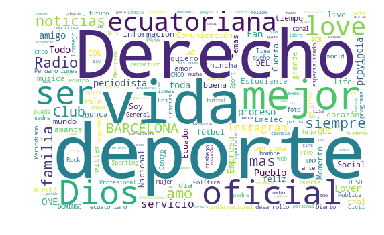

In [15]:
from wordcloud import WordCloud
filtered_words = ' '.join(wds2.word)
wordcloud = WordCloud(background_color='white', width=500, height=300).generate(filtered_words)
plt.imshow(wordcloud)
plt.axis("off")

# conversations

In [7]:
conv = ds[(ds.num_replies>1)]
conv.shape

(969090, 12)

In [8]:
users=conv.groupby('conversation_id').agg({'screen_name': 'nunique', 'id': 'count'})
users= users.reset_index()
users.rename(columns={'screen_name': 'num_users', 'id': 'num_tweets'}, inplace=True)
users.head()

,conversation_id,num_users,num_tweets
0,1293412597,2,4
1,1296969232,2,8
2,5157432533,2,2
3,6212673769,2,2
4,9755485869,2,7


In [9]:
users.sort_values('num_tweets', ascending=False).head()

,conversation_id,num_users,num_tweets
13189,763107068131807232,2,520
126511,818161879407214593,50,393
136345,819635104888721408,29,384
35278,767105707212677120,130,374
198785,829705772368007169,9,323


In [10]:
conv[conv.conversation_id==763107068131807232]

,id,screen_name,statuses_count,followers_count,friends_count,favourites_count,location,description,latitude,text,conversation_id,num_replies
313067,763112492738510852,marlonmosquera7,3817,209,387,873,Guayaquil,Ayer hoy y siempre hincha del único Idolo del ...,NaN,@SanchezJoselo @AngelEncalada #AlMonumentalCon...,763107068131807232,520
313068,763112592772632576,marlonmosquera7,3818,209,387,873,Guayaquil,Ayer hoy y siempre hincha del único Idolo del ...,NaN,@SanchezJoselo @AngelEncalada #AlMonumentalCon...,763107068131807232,520
313069,763112625999863809,marlonmosquera7,3819,209,387,873,Guayaquil,Ayer hoy y siempre hincha del único Idolo del ...,NaN,@SanchezJoselo @AngelEncalada #AlMonumentalCon...,763107068131807232,520
313070,763112700268478464,marlonmosquera7,3820,209,387,873,Guayaquil,Ayer hoy y siempre hincha del único Idolo del ...,NaN,@SanchezJoselo @AngelEncalada #AlMonumentalCon...,763107068131807232,520
313071,763112948336386048,marlonmosquera7,3822,209,387,873,Guayaquil,Ayer hoy y siempre hincha del único Idolo del ...,NaN,@SanchezJoselo @AngelEncalada #AlMonumentalCon...,763107068131807232,520
313072,763113015810068485,marlonmosquera7,3823,209,387,873,Guayaquil,Ayer hoy y siempre hincha del único Idolo del ...,NaN,@SanchezJoselo @AngelEncalada #AlMonumentalCon...,763107068131807232,520
313073,763113097930440704,marlonmosquera7,3824,209,387,873,Guayaquil,Ayer hoy y siempre hincha del único Idolo del ...,NaN,@SanchezJoselo @AngelEncalada #AlMonumentalCon...,763107068131807232,520
313074,763113132248227841,marlonmosquera7,3825,209,387,873,Guayaquil,Ayer hoy y siempre hincha del único Idolo del ...,NaN,@SanchezJoselo @AngelEncalada #AlMonumentalCon...,763107068131807232,520
313075,763113170265313280,marlonmosquera7,3826,209,387,873,Guayaquil,Ayer hoy y siempre hincha del único Idolo del ...,NaN,@SanchezJoselo @AngelEncalada #AlMonumentalCon...,763107068131807232,520
313076,763113227563786240,marlonmosquera7,3827,209,387,873,Guayaquil,Ayer hoy y siempre hincha del único Idolo del ...,NaN,@SanchezJoselo @AngelEncalada #AlMonumentalCon...,763107068131807232,520


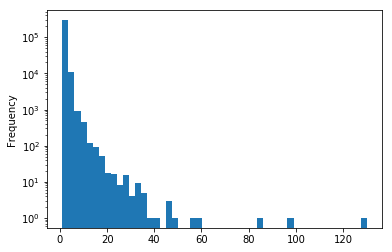

In [19]:
users.num_users.plot.hist(bins=50)
plt.yscale('log')

In [22]:
uconv = users.groupby('num_users').size()
uconv = uconv.reset_index()
uconv.columns = ['users', 'tweets']
total = uconv.tweets.sum()
uconv['perc'] = uconv.tweets / total
uconv['cper'] = uconv.tweets.cumsum() / total
uconv=uconv.head()
uconv.to_csv('results/user_conv.csv', index=False)
uconv.head()

,users,tweets,perc,cper
0,1,20476,0.066621,0.066621
1,2,245417,0.798488,0.865109
2,3,29128,0.094771,0.959880
3,4,7029,0.022870,0.982749
4,5,2420,0.007874,0.990623


conversations with 1 users are self replies, with 2 just followers 

In [32]:
users[users.num_users==2].sample(10)

,conversation_id,num_users,num_tweets
115458,816456180079980544,2,2
98113,813563345206906881,2,2
143513,820838300550332420,2,17
94167,812853083755708416,2,2
225986,834409897185968128,2,3
124704,817822473261551617,2,2
303236,883431249502711809,2,2
83835,811287764348104704,2,2
50154,770102843076476928,2,5
163863,824111566148796416,2,3


In [33]:
conv[conv.conversation_id==824736210572738560]

,id,screen_name,statuses_count,followers_count,friends_count,favourites_count,location,description,latitude,text,conversation_id,num_child_replies
1600569,824740790039617536,XboxColombia,14529,46732,520,2028,Colombia,¿Qué tan fan de Xbox eres? Demuéstralo y sigue...,,@Raulpiedrahita Hola; pronto daremos a conocer...,824736210572738560,3
1600570,824736851063894017,Raulpiedrahita,5827,271,569,1469,Cali; Colombia,Caleño; Abogado Especialista en Derecho Aduane...,,@XboxColombia Cuándo estará disponible el Cont...,824736210572738560,3
1600571,824736210572738560,XboxColombia,15587,47963,524,2337,Colombia,¿Qué tan fan de Xbox eres? Demuéstralo y sigue...,,Resident Evil 7: Biohazard ya está disponible ...,824736210572738560,3


Good conversation! at least 2 users and 3 tweets, 

In [35]:
conv[conv.conversation_id==816456180079980544]

,id,screen_name,statuses_count,followers_count,friends_count,favourites_count,location,description,latitude,text,conversation_id,num_child_replies
1146610,816456790061752320,MACHO_DOTADO,13977,7503,1642,3150,NaN,Hola amigos; soy un macho activo; me encanta c...,,@TheCloset_Gay Eso no es nada; la mayoria de h...,816456180079980544,2
1146611,816456180079980544,TheCloset_Gay,11387,49077,934,3877,,Cuenta Oficial 😈 El Mejor Contenido; Fotos De ...,,Creo que todos hemos hecho eso; para saber a q...,816456180079980544,2


NSFW tweets!!!, 

In [27]:
users[users.num_users==2].num_tweets.median()

2.0

In [39]:
y, bins = np.histogram(users[users.num_users==2].num_tweets, bins=100)
x = bins[:-1]
y_log = np.log(y)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


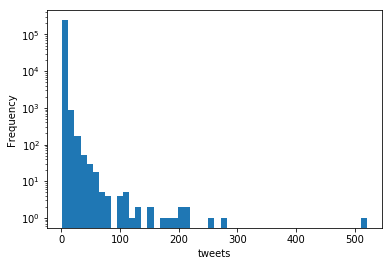

In [43]:
users[users.num_users==2].num_tweets.plot.hist(bins=50)
#plt.scatter(x, y_log)
plt.yscale('log')
plt.xlabel('tweets')

In [41]:
users[users.num_users==2].sort_values('num_tweets', ascending=False).head()

,conversation_id,num_users,num_tweets
13189,763107068131807232,2,520
295870,879033505874825216,2,272
165190,824344446837919744,2,259
286423,845690771613384707,2,212
81535,808164796122206208,2,210


In [45]:
conv[conv.conversation_id==763107068131807232].sort_values('id', ascending=False).head(3).values

array([[763215380173250560, 'marlonmosquera7', 4341, 209, 388, 877,
        'Guayaquil',
        'Ayer hoy y siempre hincha del único Idolo del Ecuador; Barcelona por supuesto...',
        '',
        '@SanchezJoselo @AngelEncalada @decampeonato #AlMonumentalConDeCampeonato voy a ver a Barcelona ganar a Zamora en la Sudamericana;276',
        763107068131807232, 520],
       [763215304952602624, 'marlonmosquera7', 4340, 209, 388, 877,
        'Guayaquil',
        'Ayer hoy y siempre hincha del único Idolo del Ecuador; Barcelona por supuesto...',
        '',
        '@SanchezJoselo @AngelEncalada @decampeonato #AlMonumentalConDeCampeonato voy a ver a Barcelona ganar a Zamora en la Sudamericana;275',
        763107068131807232, 520],
       [763215278738145284, 'marlonmosquera7', 4339, 209, 388, 877,
        'Guayaquil',
        'Ayer hoy y siempre hincha del único Idolo del Ecuador; Barcelona por supuesto...',
        '',
        '@SanchezJoselo @AngelEncalada @decampeonato #AlMonumenta

some users and journalism have those very large conv

In [36]:
users[users.num_users==3].sample(10)

,conversation_id,num_users,num_tweets
207152,831234149939867649,3,3
250885,839240830556631040,3,3
170590,825021581214654464,3,7
103729,814472384942133248,3,3
247225,838560855813939200,3,3
190417,828328816573571072,3,3
200083,829875881451548673,3,19
34098,766826329492815872,3,7
299366,882729703462907904,3,3
228478,834766309158223872,3,3


In [37]:
conv[conv.conversation_id==831234149939867649]

,id,screen_name,statuses_count,followers_count,friends_count,favourites_count,location,description,latitude,text,conversation_id,num_child_replies
1953334,831236624700813316,el_flacotirador,9456,272,305,22,NaN,Ingeniero electrónico de la UNI (retirado).Fút...,,@RFTorresT @diegoreba No te olvides de Calcate...,831234149939867649,3
1953335,831240443501371395,cmegov,16030,448,476,2531,Lima,Ingeniero de Sistemas; hincha acérrimo de Spor...,,@RFTorresT @diegoreba igual las próximas fecha...,831234149939867649,3
1953336,831234149939867649,RFTorresT,6752,230,142,6833,Lima - Peru,Mírame bien...puedo morir una y mil veces rena...,,@diegoreba con Ortiz y Blackburn habilitados; ...,831234149939867649,3
